In [14]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import keras
import matplotlib.pyplot as plt

In [24]:
data = {
    "learningFilePath": '/Users/sangminlee/model-factory/restapiserver/src/main/resources/피마족_인디언_당뇨병_발병_데이터셋.csv',
    "modelPath": "/Users/sangminlee/model-factory/restapiserver/src/main/resources/78/model.h5",
    "diagramPath": "/Users/sangminlee/model-factory/restapiserver/src/main/resources/78/diagram.svg",
    "prediction": "binary",
    "inputColumns": [
        "임신 횟수",
        "혈장 포도당 농도",
        "이완기 혈압",
        "삼두근 피부 두께",
        "혈청 인슐린",
        "체질량 지수",
        "당뇨 직계 가족력",
        "나이"
    ],
    "outputColumns": [
        "당뇨병 발병 여부"
    ],
    "batchSize": 64,
    "epoch": 10,
    "lossFunction": "binary_crossentropy",
    "optimizerFunction": "adam",
    "memberId": 1,
    "layers": [
        {
            "number": 0,
            "activationFunction": "relu",
            "neuronCount": 256
        },
        {
            "number": 1,
            "activationFunction": "dropout",
            "neuronCount": 25
        },
        {
            "number": 2,
            "activationFunction": "relu",
            "neuronCount": 256
        },
        {
            "number": 3,
            "activationFunction": "dropout",
            "neuronCount": 25
        },
        {
            "number": 4,
            "activationFunction": "relu",
            "neuronCount": 256
        },
        {
            "number": 5,
            "activationFunction": "dropout",
            "neuronCount": 25
        },
        {
            "number": 6,
            "activationFunction": "sigmoid",
            "neuronCount": 1
        },
    ]
}

In [16]:
# 파일 불러오기
dataset = pd.read_csv(data['learningFilePath'])

# 학습셋, 검증셋, 시험셋 분리
x_train = dataset[data.get('inputColumns')].values.astype('float32')
train_length = int(len(x_train) * 0.7)
val_length = int(len(x_train) * 0.2)
x_test = x_train[train_length + val_length:]
x_val = x_train[train_length: train_length + val_length]
x_train = x_train[:train_length]

# 학습셋, 검증셋, 시험셋 분리
y_train = dataset[data.get('outputColumns')].values.astype('float32')
y_test = y_train[train_length + val_length:]
y_val = y_train[train_length: train_length + val_length]
y_train = y_train[:train_length]

x_length = len(x_test[0])
y_length = len(y_test[0])

In [17]:
def review (model, hist):
    scores = model.evaluate(x_test, y_test)
    print('%s: %.2f%%' %(model.metrics_names[1], scores[1] * 100))

    fig, loss_ax = plt.subplots()

    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuracy')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')

    plt.show()
    
def visualize(model):
    return SVG(model_to_dot(model, show_shapes=True, dpi=65)
                .create(prog='dot', format='svg'))

In [18]:
layers = data.get('layers')

In [19]:
model = Sequential()
for layer in layers:
    if layer['number'] == 0:
        model.add(Dense(layer['neuronCount'],
                       input_dim = x_length,
                       activation = layer['activationFunction']))

    else:
        activation = layer['activationFunction']
        neuron = layer['neuronCount']
        if activation == 'dropout':
            model.add(Dropout(neuron * 0.01))
        else:
            model.add(Dense(neuron, activation=activation))

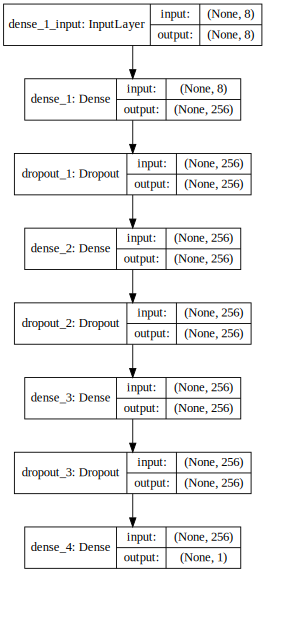

In [20]:
visualize(model)

In [60]:
class CustomHistory(keras.callbacks.Callback):
    def init(self, totalEpoch):
        self.epochCount = 0
        self.epochCycle = totalEpoch * 0.1
    
    def on_epoch_end(self, batch, logs={}):
        self.epochCount += 1
        if self.epochCount % self.epochCycle == 0:
            print()
            print('\n=== train loss ===')
            print(logs.get('loss'))
            print('\n=== val loss ===')
            print(logs.get('val_loss'))
            print('\n=== train acc ===')
            print(logs.get('accuracy'))
            print('\n=== val acc ===')
            print(logs.get('val_accuracy'))
            print()

In [ ]:
class RestApi:
    

In [61]:
data.get('epoch')

10

In [62]:
custom_hist = CustomHistory()
custom_hist.init(data.get('epoch'))

In [63]:
model.compile(optimizer=data.get('optimizerFunction'),
                loss=data.get('lossFunction'),
                metrics=['accuracy'])

In [64]:
hist = model.fit(x_train, y_train, epochs=data.get('epoch'),
                 callbacks=[custom_hist], batch_size=data.get('batchSize'),
                 validation_data=(x_val, y_val))

Train on 537 samples, validate on 153 samples
Epoch 1/10
537/537 [==============================] - 0s 526us/step - loss: 0.6498 - accuracy: 0.6853 - val_loss: 0.6243 - val_accuracy: 0.6275


=== train loss ===
0.6498076997877721

=== val loss ===
0.6242831816860274

=== train acc ===
0.68528867

=== val acc ===
0.6274510025978088

Epoch 2/10
537/537 [==============================] - 0s 65us/step - loss: 0.6160 - accuracy: 0.6983 - val_loss: 0.5928 - val_accuracy: 0.6863


=== train loss ===
0.6160216343691451

=== val loss ===
0.5927885139689726

=== train acc ===
0.698324

=== val acc ===
0.686274528503418

Epoch 3/10
537/537 [==============================] - 0s 55us/step - loss: 0.6201 - accuracy: 0.6890 - val_loss: 0.6160 - val_accuracy: 0.6732


=== train loss ===
0.6201226434894114

=== val loss ===
0.6160392476842295

=== train acc ===
0.68901306

=== val acc ===
0.673202633857727

Epoch 4/10
537/537 [==============================] - 0s 65us/step - loss: 0.6168 - accuracy: 0.

78/78 [==============================] - 0s 63us/step
accuracy: 61.54%


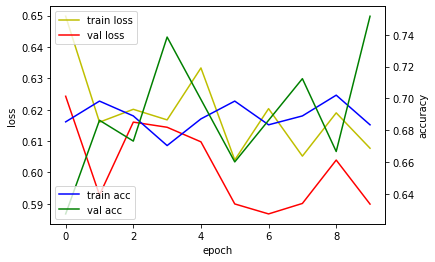

In [65]:
review(model, hist)

[3.4963095343534727,
 2.375024800860016,
 1.7732531314011615,
 1.502326496597553,
 1.2249160421183212,
 1.136912730597029,
 0.9552291374188784,
 0.9366951409442908,
 0.8608316647051877,
 0.9000325412723605]